# Seaborn


* Seaborn yra duomenų vizualizacijos biblioteka.
* Ji sukurta Matplotlib pagrindu.
* Stilistiškai kiek išbaigtesnė už Matplotlib.
* Labai gerai veikia su pandas DataFrame'ais.
* Labai plačiai naudojama duomenų analizėje.


In [3]:
import seaborn as sns
import pandas as pd
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [5]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [7]:
tips.shape

(244, 7)

# Pasiskirstymo histogramos

# .displot()

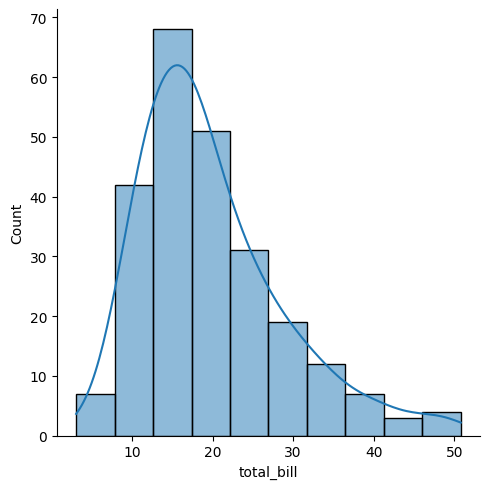

In [14]:
# kde - linija, bins - stulpeliu skaicius. Daugiausiai saskaitu tarp 10 ir 20
sns.displot(tips['total_bill'], kde=True, bins=10)

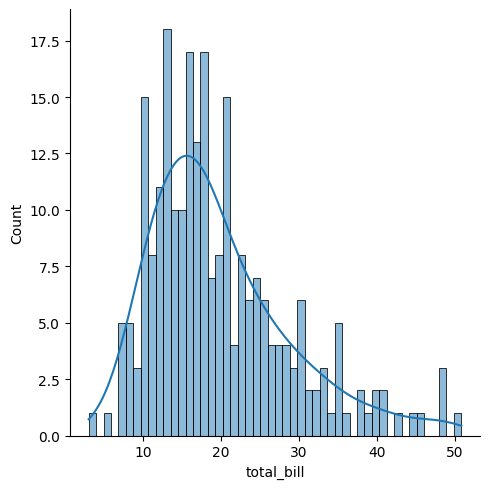

In [16]:
sns.displot(tips['total_bill'], kde=True, bins=50)

# .scatterplot()

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

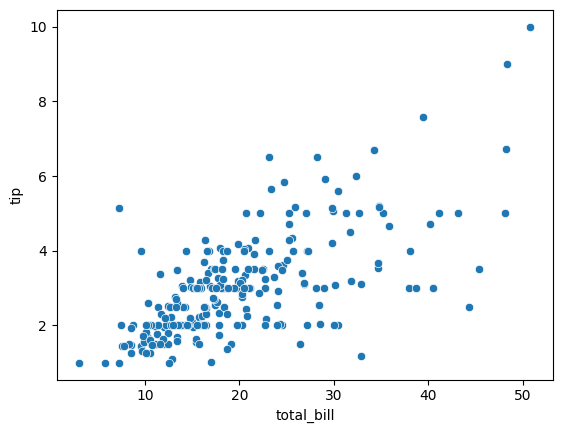

In [21]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

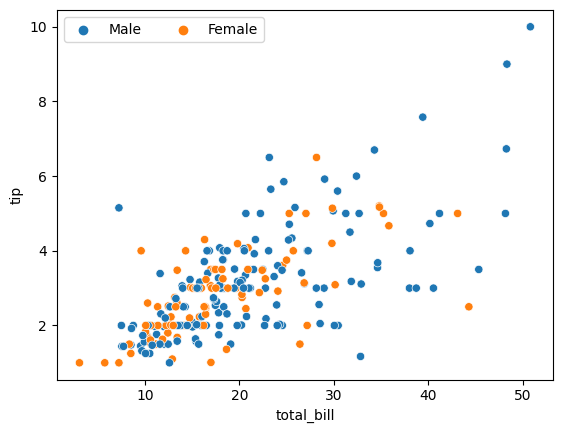

In [39]:
# Parametruose taip pat galima nurodyti hue ir size reikšmes:
plot = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plot.legend(ncol=3)

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

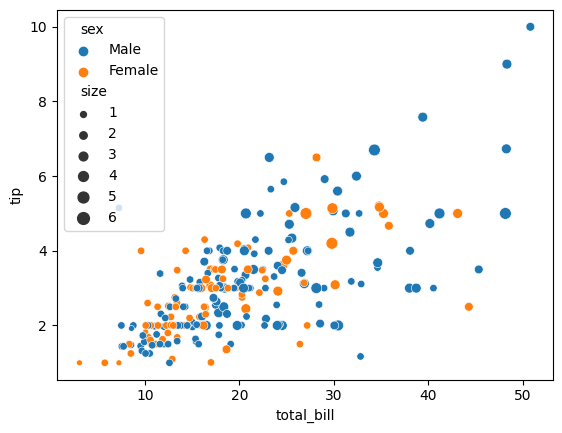

In [27]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', size='size')

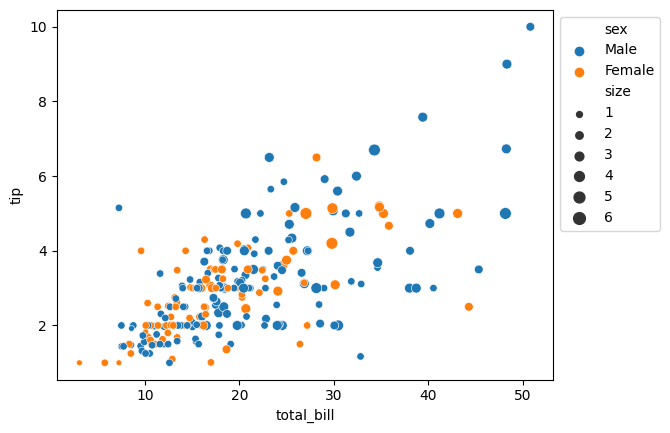

In [34]:
plot = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', size='size')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

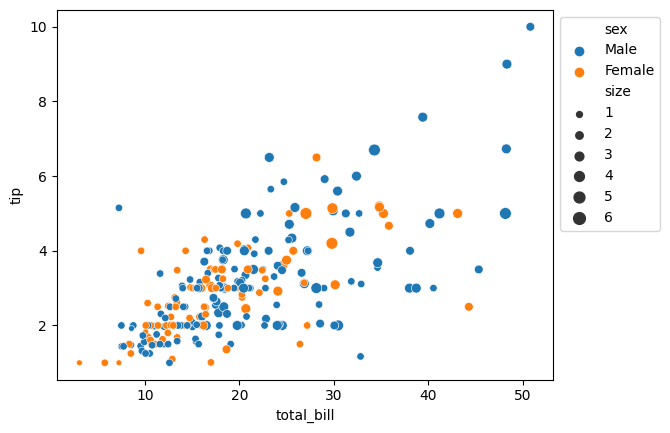

In [40]:
plot = sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', size='size')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

# .jointplot()

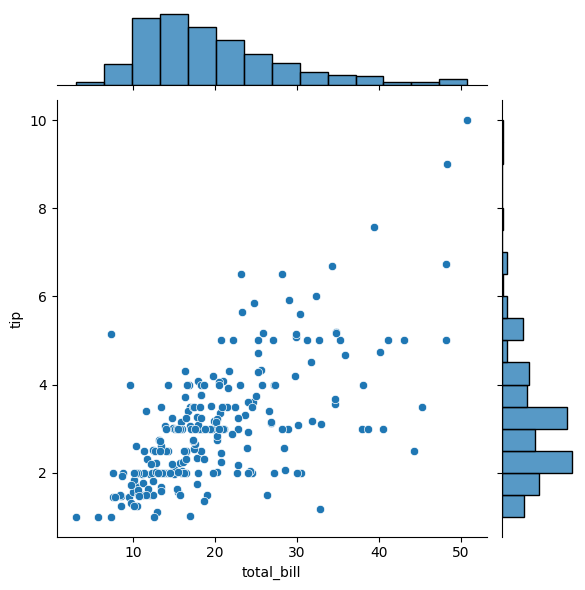

In [18]:
sns.jointplot(data=tips, x='total_bill', y='tip')

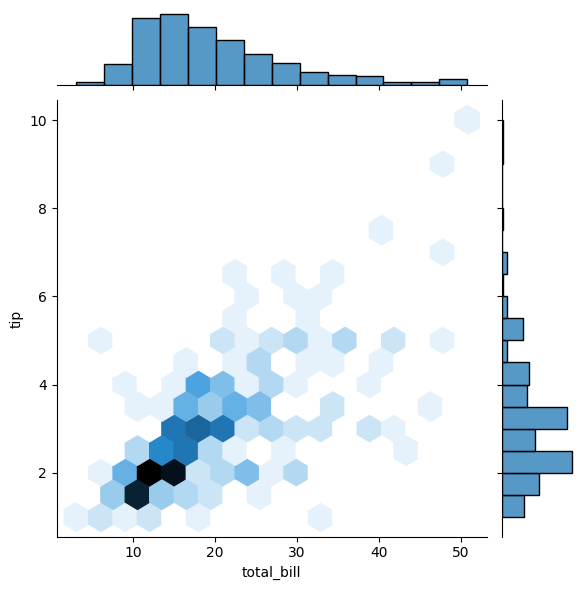

In [19]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')

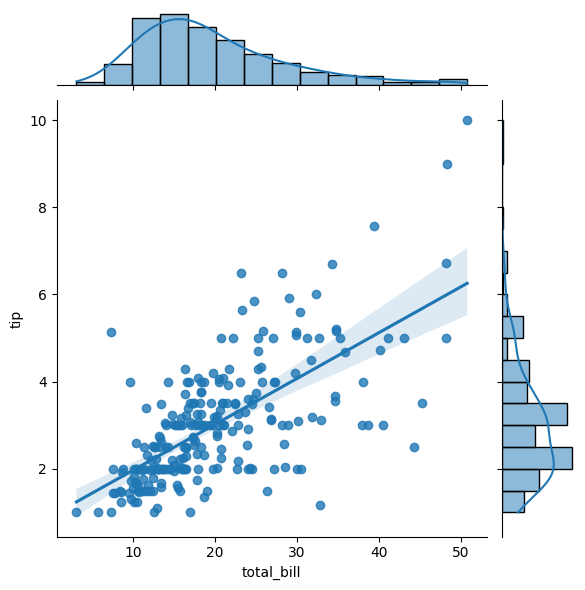

In [20]:
# reikšmė 'reg' stengiasi nubrėžti mums liniją, kuri atspindėtų tendenciją.
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

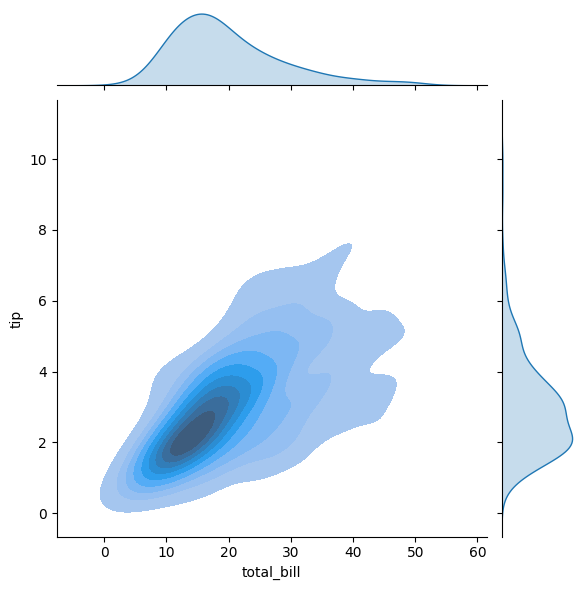

In [23]:
# taip pat galime naudoti kind su 'kde' reikšme. Tokiu atveju matysime didžiausio tankio zonas:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde', fill=True)

# .pairplot()

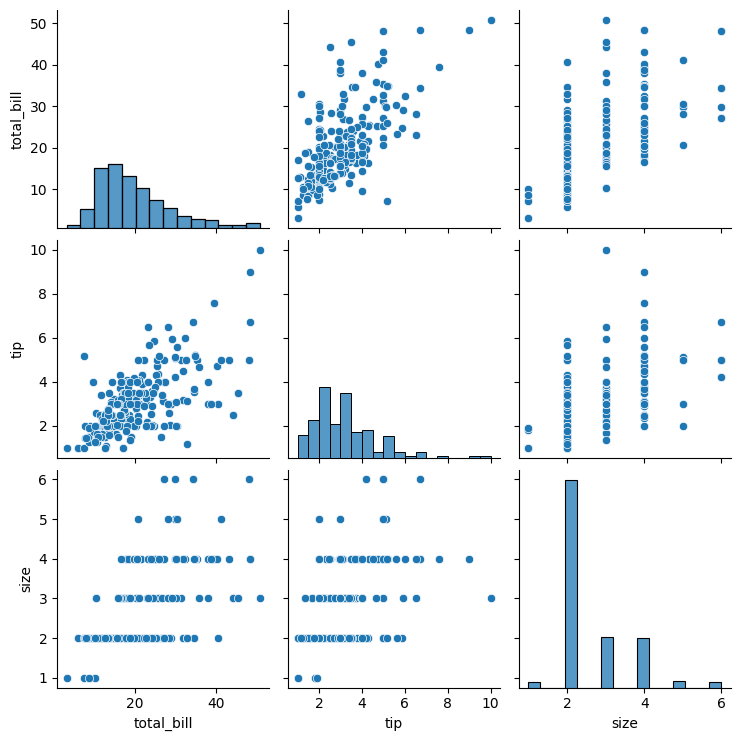

In [41]:
sns.pairplot(tips)

<AxesSubplot: xlabel='total_bill', ylabel='size'>

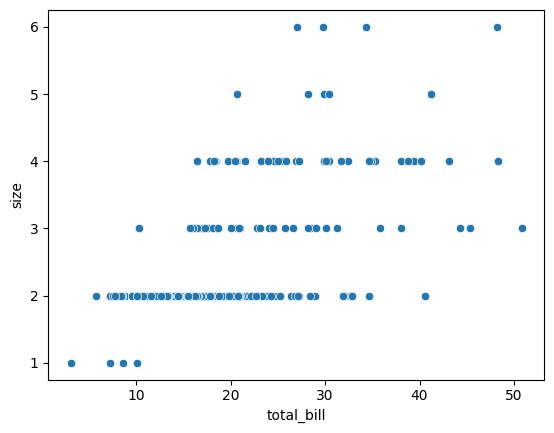

In [42]:
sns.scatterplot(x='total_bill', y='size', data=tips)

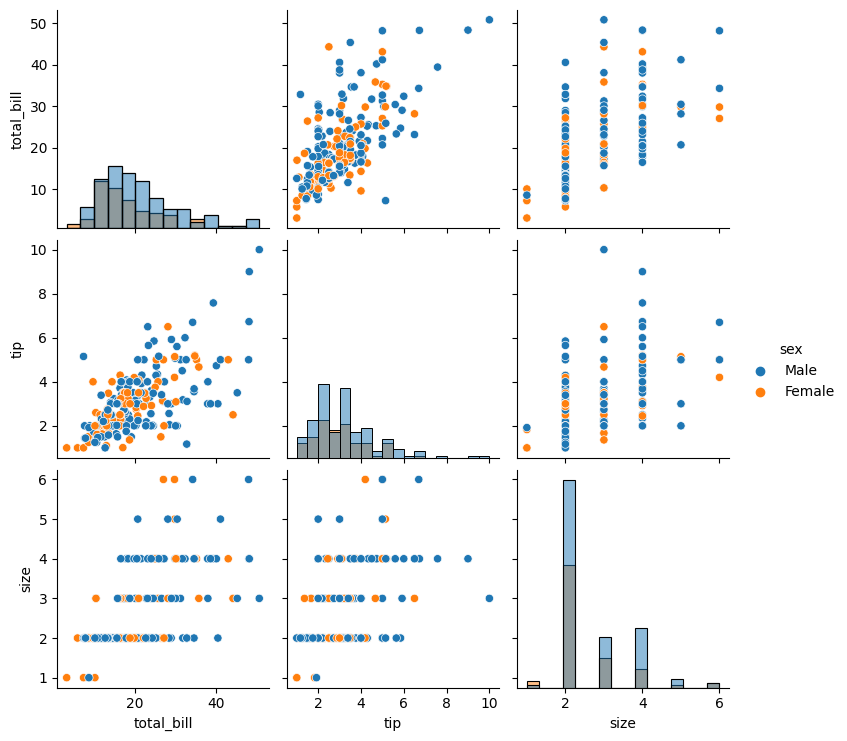

In [46]:
sns.pairplot(tips, hue='sex', diag_kind='hist')

# Kategorizavimo histogramos

# .barplot()

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

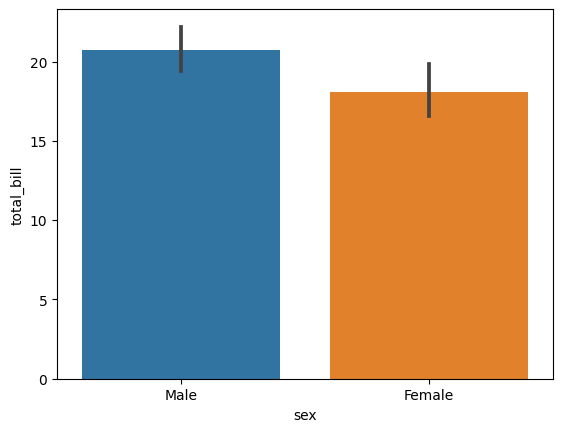

In [47]:
# .barplot() išskirsto kategorijas pagal kurį nors rodiklį ir leidžia tam rodikliui taikyti kokią nors funkciją:
sns.barplot(data=tips, x='sex', y='total_bill')

<AxesSubplot: xlabel='sex', ylabel='tip'>

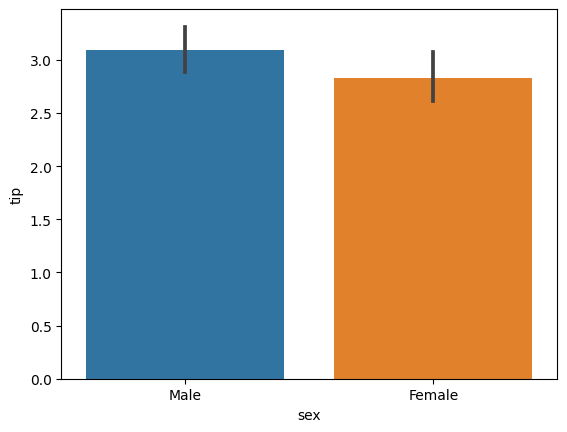

In [49]:
sns.barplot(data=tips, x='sex', y='tip')

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

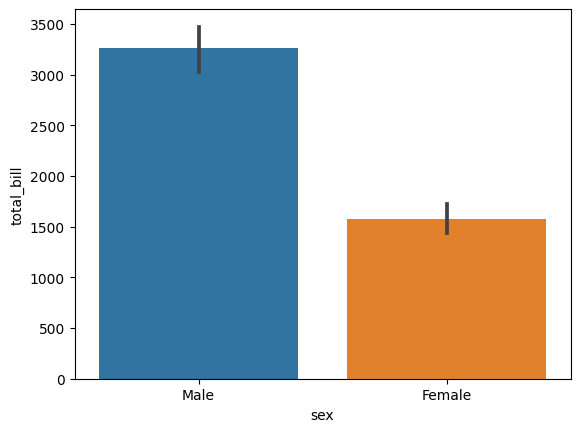

In [50]:
# Jeigu mes nenurodome, kokia ta funkcija, numatyta reikšmė yra vidurkis. 
# Taigi šiame pavyzdyje matome sąskaitos vidurkių pasiskirstymą tarp lyčių. Jeigu norime nurodyti vidurkį, turime naudoti estimator parametrą, pvz.:
sns.barplot(data=tips, x='sex', y='total_bill', estimator='sum')

C:\Users\ingri\AppData\Local\Temp\ipykernel_10744\1882809045.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=tips, x='sex', y='total_bill', hue='day', estimator='sum', ci=False)


<AxesSubplot: xlabel='sex', ylabel='total_bill'>

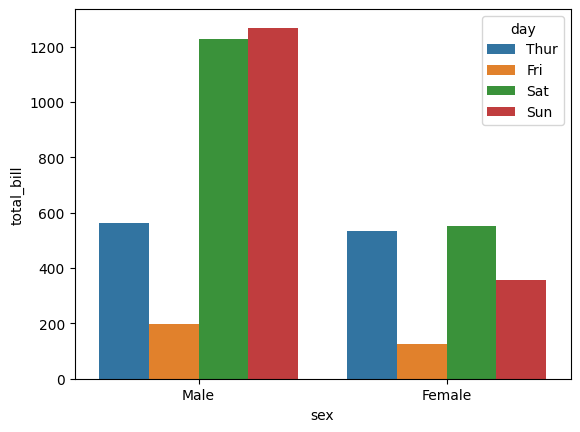

In [52]:
# Šiuo atveju matome bendras sumas. Taip pat panaudojome hue, tokiu būdu rezultatą išskirstydami savaitės dienomis. 
# Nekreipkite dėmesio į juodas linijas, jos yra error bars, rodo statistinį skaičiavimo patikimumą, ir nėra mums aktualios. 
# Norint jas išjungti, parametruose nurodykite ci=False
sns.barplot(data=tips, x='sex', y='total_bill', hue='day', estimator='sum', ci=False)

# .countplot()

tiesiog suskaičiuoja kategorijas:

<AxesSubplot: xlabel='smoker', ylabel='count'>

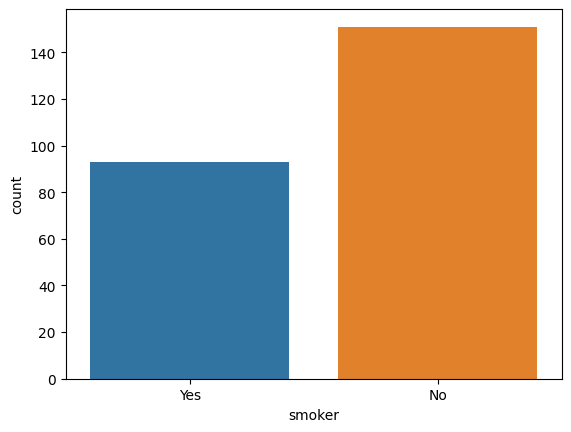

In [53]:
sns.countplot(tips, x='smoker')

# .boxplot()

stačiakampės diagramos

<AxesSubplot: xlabel='smoker', ylabel='total_bill'>

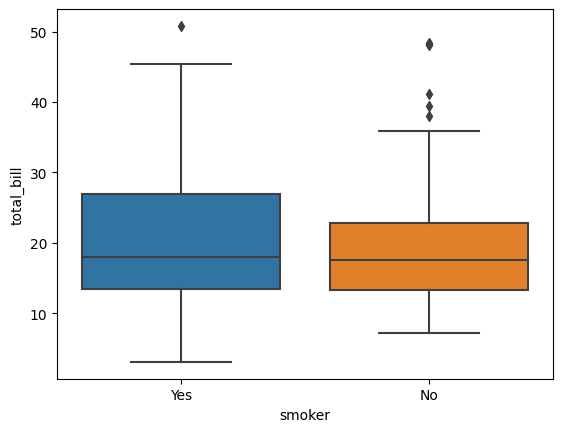

In [54]:
sns.boxplot(tips, x='smoker', y='total_bill')

Kas yra boxplot (stačiakampė diagrama)? Iš esmės tai į ketvirtadalius sugrupuota informacija. Mūsų pavyzdyje matosi, kad rūkalių viršutinis ketvirtadalis maistui išleido nuo ~28 iki ~46, kai tuo tarpu nerūkančiųjų viršutinis ketvirtadalis išleido nuo ~24 iki ~37. Taškai viršuje yra išimtys. Jie pasitaiko per retai, kad būtų įtraukti į ketvirtadalius.

# .heatmap()

pandas turi metodą, kuris parodo skaičių koreliacijas lentelėje:

In [57]:
koreliacijos = tips.corr(numeric_only=True)
koreliacijos

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


čia turime koreliacijų matricą. Ji rodo, kaip skirtingi kintamieji tarpusavyje koreliuoja. Kad būtų lengviau skaityti, atsispausdinkime vizualizaciją (mozaikinę diagramą):

<AxesSubplot: >

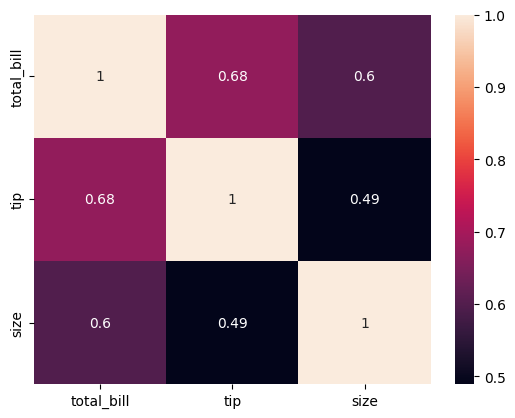

In [58]:
sns.heatmap(koreliacijos, annot=True)

# .FacetGrid()

leidžia susikurti tinklelį, kurį vėliau reikės užpildyti diagramomis. Pvz.:

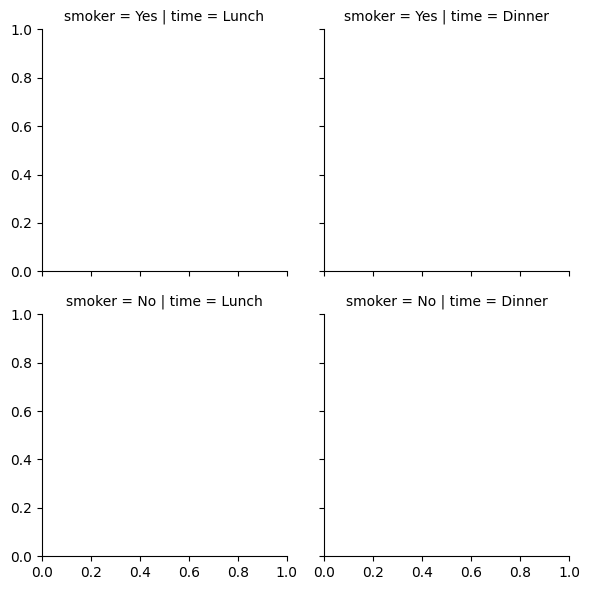

In [59]:
sns.FacetGrid(tips, col='time', row='smoker')

O pats užpildymas atrodo taip:

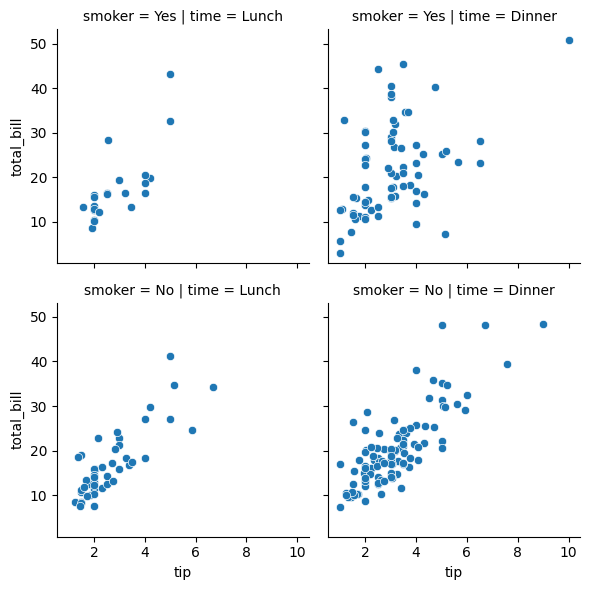

In [61]:
grid = sns.FacetGrid(tips, col='time', row='smoker')
grid.map(sns.scatterplot, 'tip', 'total_bill')

# Stilius ir spalvos

# .set_style()
# palette parametras

Seaborn leidžia nustatyti stilių su .set_style() metodu. Į parametrus reikia įkelti vieną iš šių reikšmių - darkgrid, whitegrid, dark, white, ticks

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

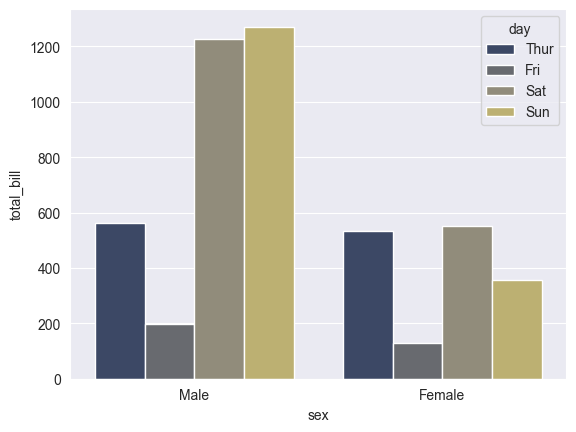

In [67]:
sns.set_style('darkgrid')
sns.barplot(
    x='sex', y='total_bill', data=tips, 
    hue='day', estimator=sum, 
    palette='cividis', 
    errorbar=('ci', False)
)
# error - vidutine paklaida

palette parametras leidžia pasirinkti vieną iš paruoštų naudoti spalvų palečių. Jas rasite čia. Kai kurie metodai nepriima parametro palette, tuomet reikia bandyti tas pačias reikšmes nurodyti į cmap parametrą. 

Rekomendacija: pasitikrinti galimus įvairių metodų parametrus galite kursoriui mirksint skliaustelių viduje, spaudžiant Shift+Tab

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

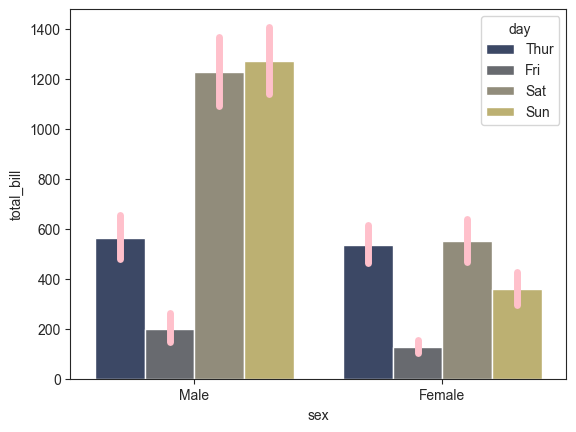

In [74]:
sns.set_style('ticks')
sns.barplot(
    x='sex', y='total_bill', data=tips, 
    hue='day', estimator=sum, 
    palette='cividis',
    errcolor='pink', errwidth=5,
)


<AxesSubplot: xlabel='sex', ylabel='total_bill'>

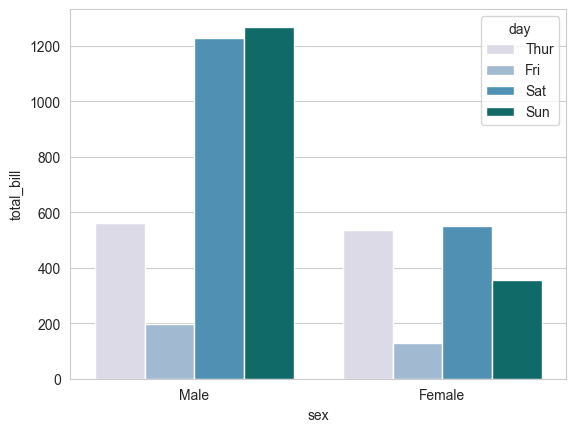

In [81]:
sns.set_style('whitegrid')
sns.barplot(
    data=tips, x='sex', y='total_bill',  
    hue='day', estimator=sum, 
    palette='PuBuGn',
    errorbar=('ci', False)
)

# .despine()

Nuima viršutinį ir dešinį rėmą.

In [ ]:
sns.set_style('whitegrid')
sns.barplot(
    data=tips, x='sex', y='total_bill',  
    hue='day', estimator=sum, 
    palette='PuBuGn',
    errorbar=('ci', False)
)
sns.despine()